In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import mlflow
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:/Project/Clickstream_Project/Clickstream/Dataset for Notebooks folder/Final dataset for classification model.csv")

In [4]:
df.shape

(132379, 24)

In [5]:
df.head()

,order,page,is_bounce,exit_rate,page2_grouped_Category 1,page2_grouped_Category 3,page2_grouped_Other,country_21,country_24,country_29,...,colour_6,colour_9,colour_14,colour_Other,location_2,location_3,location_4,location_5,location_6,price_2
0,2,1,0,-0.275203,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,2
1,3,1,0,-0.275203,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
2,4,1,0,-0.275203,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,2
3,5,1,0,0.842840,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,6,4,0,-0.275203,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [5]:
x = df.drop('price_2', axis=1)
y = df['price_2']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

In [8]:
print(len(x_train),len(y_train))

92665 92665


In [9]:
print(len(x_test),len(y_test))

39714 39714


In [10]:
# Model Building

In [11]:
#Logestic regression model
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
train_predict = model.predict(x_train)

In [15]:
test_predict = model.predict(x_test)

In [16]:
from sklearn import metrics

In [17]:
# confusion matrix for traning
metrics.confusion_matrix(y_train, train_predict)

array([[32754, 14634],
       [17441, 27836]], dtype=int64)

In [18]:
# confusion matrix for testing
metrics.confusion_matrix(y_test, test_predict)

array([[14052,  6274],
       [ 7519, 11869]], dtype=int64)

In [19]:
# classification report for training
print(metrics.classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           1       0.65      0.69      0.67     47388
           2       0.66      0.61      0.63     45277

    accuracy                           0.65     92665
   macro avg       0.65      0.65      0.65     92665
weighted avg       0.65      0.65      0.65     92665



In [20]:
#classification report for testing
print(metrics.classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           1       0.65      0.69      0.67     20326
           2       0.65      0.61      0.63     19388

    accuracy                           0.65     39714
   macro avg       0.65      0.65      0.65     39714
weighted avg       0.65      0.65      0.65     39714



In [21]:
y_train_binary = (y_train == 2).astype(int)  # Convert 1 → 0 and 2 → 1

AUC:0.653


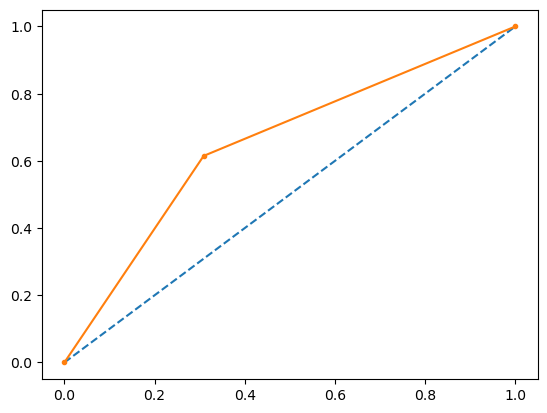

In [22]:
# AUC and ROC for training

auc = metrics.roc_auc_score(y_train_binary, train_predict)
print('AUC:%.3f' % auc)

# calculating roc curve
fpr, trp, thersholds = metrics.roc_curve(y_train_binary, train_predict)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr, trp, marker='.')
plt.show()


In [23]:
y_test_binary = (y_test == 2).astype(int)  # Convert 1 → 0 and 2 → 1

AUC:0.652


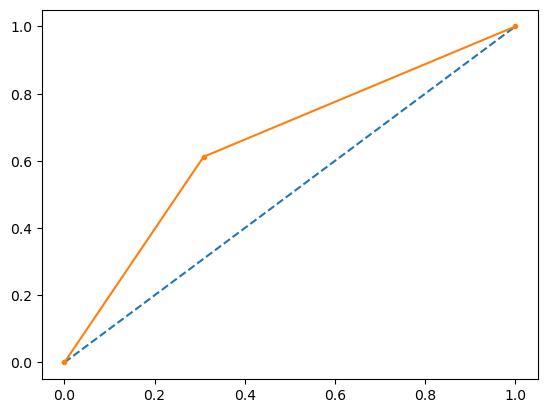

In [24]:
# AUC & ROC curve for testing

auc = metrics.roc_auc_score(y_test_binary, test_predict)
print('AUC:%.3f' % auc)

fpr, trp, thershold = metrics.roc_curve(y_test_binary, test_predict)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, trp, marker ='.')
plt.show()

In [28]:
train_report = metrics.classification_report(y_train, train_predict,  output_dict=True )
train_report

{'1': {'precision': 0.6525351130590696,
  'recall': 0.6911876424411243,
  'f1-score': 0.6713054527940318,
  'support': 47388.0},
 '2': {'precision': 0.6554273604897575,
  'recall': 0.6147933829538176,
  'f1-score': 0.634460437393871,
  'support': 45277.0},
 'accuracy': 0.653860680947499,
 'macro avg': {'precision': 0.6539812367744136,
  'recall': 0.6529905126974709,
  'f1-score': 0.6528829450939514,
  'support': 92665.0},
 'weighted avg': {'precision': 0.6539482926513563,
  'recall': 0.653860680947499,
  'f1-score': 0.6533026279704945,
  'support': 92665.0}}

In [29]:
test_report = metrics.classification_report(y_test, test_predict,  output_dict=True )
test_report

{'1': {'precision': 0.6514301608641231,
  'recall': 0.6913312998130473,
  'f1-score': 0.6707878845740746,
  'support': 20326.0},
 '2': {'precision': 0.6541916992779584,
  'recall': 0.6121827934805034,
  'f1-score': 0.6324904745410461,
  'support': 19388.0},
 'accuracy': 0.6526917459837841,
 'macro avg': {'precision': 0.6528109300710407,
  'recall': 0.6517570466467754,
  'f1-score': 0.6516391795575603,
  'support': 39714.0},
 'weighted avg': {'precision': 0.6527783178557997,
  'recall': 0.6526917459837841,
  'f1-score': 0.6520914504269134,
  'support': 39714.0}}

In [50]:
# HyperParameter tuning

from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {
    'C' : [0.01,0.1,1,10,100],
    'solver' : ['liblinear', 'lbfgs'],
    'penalty' : ['l2'],
    'class_weight' : [None, 'balanced'] }

log_reg = LogisticRegression(max_iter = 1000)
grid_search = GridSearchCV(log_reg, param_grid = param_grid, scoring = 'recall', cv=5, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='recall', verbose=2)

In [55]:
best_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}


In [56]:
best_model.fit(x_train, y_train)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000)

In [58]:
train_predict = best_model.predict(x_train)

In [59]:
test_predict = best_model.predict(x_test)

In [60]:
# confusion matrix for traning
metrics.confusion_matrix(y_train, train_predict)

array([[32420, 14968],
       [16606, 28671]], dtype=int64)

In [61]:
# confusion matrix for testing
metrics.confusion_matrix(y_test, test_predict)

array([[13890,  6436],
       [ 7180, 12208]], dtype=int64)

In [62]:
# classification report for training
print(metrics.classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67     47388
           1       0.66      0.63      0.64     45277

    accuracy                           0.66     92665
   macro avg       0.66      0.66      0.66     92665
weighted avg       0.66      0.66      0.66     92665



In [63]:
#classification report for testing
print(metrics.classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67     20326
           1       0.65      0.63      0.64     19388

    accuracy                           0.66     39714
   macro avg       0.66      0.66      0.66     39714
weighted avg       0.66      0.66      0.66     39714



In [40]:
# AUC and ROC can be plot with 0 and 1 only. So, we need to convert the target variable to binary
y_train_binary = (y_train == 2).astype(int)  # Convert 1 → 0 and 2 → 1

AUC:0.653


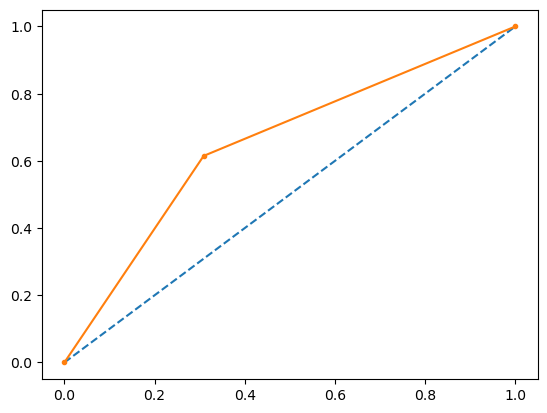

In [41]:
# AUC and ROC for training

auc = metrics.roc_auc_score(y_train_binary, train_predict)
print('AUC:%.3f' % auc)

# calculating roc curve
fpr, trp, thersholds = metrics.roc_curve(y_train_binary, train_predict)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr, trp, marker='.')
plt.show()

In [43]:
y_test_binary = (y_test == 2).astype(int)  # Convert 1 → 0 and 2 → 1

AUC:0.652


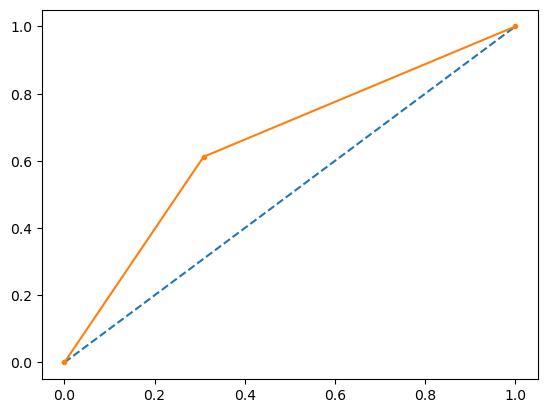

In [44]:
# AUC & ROC curve for testing

auc = metrics.roc_auc_score(y_test_binary, test_predict)
print('AUC:%.3f' % auc)

fpr, trp, thershold = metrics.roc_curve(y_test_binary, test_predict)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, trp, marker ='.')
plt.show()

In [2]:
# random Forest model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_jobs=-1,
    random_state= 1,
    verbose=2)
rfc.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s


building tree 35 of 100building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100

building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100building tree 60 of 100

building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


RandomForestClassifier(n_jobs=-1, random_state=1, verbose=2)

In [42]:
train_predict = rfc.predict(x_train)
test_predict = rfc.predict(x_test)
print(metrics.confusion_matrix(y_train, train_predict))
print(metrics.confusion_matrix(y_test, test_predict))
print(metrics.classification_report(y_train, train_predict))
print(metrics.classification_report(y_test, test_predict))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s


[[44106  3282]
 [ 4195 41082]]
[[18422  1904]
 [ 2398 16990]]
              precision    recall  f1-score   support

           1       0.91      0.93      0.92     47388
           2       0.93      0.91      0.92     45277

    accuracy                           0.92     92665
   macro avg       0.92      0.92      0.92     92665
weighted avg       0.92      0.92      0.92     92665

              precision    recall  f1-score   support

           1       0.88      0.91      0.90     20326
           2       0.90      0.88      0.89     19388

    accuracy                           0.89     39714
   macro avg       0.89      0.89      0.89     39714
weighted avg       0.89      0.89      0.89     39714



[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [55]:
# Hyper tuning of RandomForestClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = { 'n_estimators' : [100,200,300],
        'max_depth' : [10,20,30],
        'min_samples_leaf' : [1,2,4],
        'min_samples_split' : [2,5,10],
        'max_features' : ['sqrt','log2']}

rfc = RandomForestClassifier(random_state = 1)
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring = 'accuracy', verbose = 2, n_jobs = -1)
rfc_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [22]:
print("Best Parameters:", rfc_grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [49]:
best_params = {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
best_rfc = RandomForestClassifier(**best_params, random_state = 1)
best_rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=200,
                       random_state=1)

In [56]:
train_predict = best_rfc.predict(x_train)
test_predict = best_rfc.predict(x_test)
print(metrics.confusion_matrix(y_train, train_predict))
print(metrics.confusion_matrix(y_test, test_predict))
print(metrics.classification_report(y_train, train_predict))
print(metrics.classification_report(y_test, test_predict))

[[43519  3869]
 [ 4765 40512]]
[[18544  1782]
 [ 2313 17075]]
              precision    recall  f1-score   support

           1       0.90      0.92      0.91     47388
           2       0.91      0.89      0.90     45277

    accuracy                           0.91     92665
   macro avg       0.91      0.91      0.91     92665
weighted avg       0.91      0.91      0.91     92665

              precision    recall  f1-score   support

           1       0.89      0.91      0.90     20326
           2       0.91      0.88      0.89     19388

    accuracy                           0.90     39714
   macro avg       0.90      0.90      0.90     39714
weighted avg       0.90      0.90      0.90     39714



In [57]:
# Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier 

In [61]:
dtc = DecisionTreeClassifier(random_state = 1)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [68]:
from sklearn import tree

In [71]:
train_char_label = [str(cls) for cls in sorted(y_train.unique())]  # Convert to strings

credit_tree_regularized = 'dec.dot'
dot_data = tree.export_graphviz(dtc, out_file= credit_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

In [62]:
train_predict = dtc.predict(x_train)
test_predict = dtc.predict(x_test)
print(metrics.confusion_matrix(y_train, train_predict))
print(metrics.confusion_matrix(y_test, test_predict))
print(metrics.classification_report(y_train, train_predict))
print(metrics.classification_report(y_test, test_predict))

[[44403  2985]
 [ 4491 40786]]
[[18512  1814]
 [ 2515 16873]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.92     47388
           2       0.93      0.90      0.92     45277

    accuracy                           0.92     92665
   macro avg       0.92      0.92      0.92     92665
weighted avg       0.92      0.92      0.92     92665

              precision    recall  f1-score   support

           1       0.88      0.91      0.90     20326
           2       0.90      0.87      0.89     19388

    accuracy                           0.89     39714
   macro avg       0.89      0.89      0.89     39714
weighted avg       0.89      0.89      0.89     39714



In [63]:
y_train_binary = (y_train == 2).astype(int)  # Convert 1 → 0 and 2 → 1

AUC:0.919


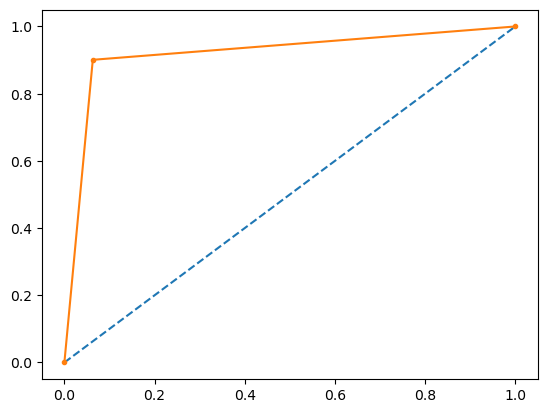

In [64]:
# AUC and ROC for training

auc = metrics.roc_auc_score(y_train_binary, train_predict)
print('AUC:%.3f' % auc)

# calculating roc curve
fpr, trp, thersholds = metrics.roc_curve(y_train_binary, train_predict)
plt.plot([0,1], [0,1], linestyle= '--')
plt.plot(fpr, trp, marker='.')
plt.show()

In [65]:
y_test_binary = (y_test == 2).astype(int)  # Convert 1 → 0 and 2 → 1

AUC:0.891


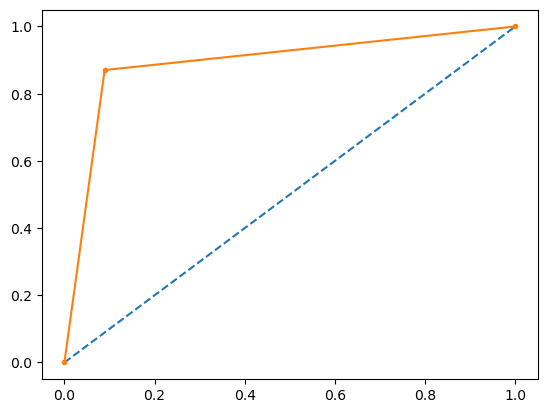

In [66]:
# AUC & ROC curve for testing

auc = metrics.roc_auc_score(y_test_binary, test_predict)
print('AUC:%.3f' % auc)

fpr, trp, thershold = metrics.roc_curve(y_test_binary, test_predict)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, trp, marker ='.')
plt.show()

In [ ]:
# Hyperparameter tuning

In [10]:
dtc = DecisionTreeClassifier(random_state = 1)

grid_params = {
    'criterion' : ['gini','entropy'],
    'max_depth' :[10,20,30,None],
    'min_samples_leaf' : [4,10,16],
    'min_samples_split' : [2,5,8],
    'max_features' : ['sqrt', 'log2', None]}

dtc_grid_search = GridSearchCV( dtc, grid_params, cv =5, verbose = 2, scoring = 'accuracy', n_jobs =-1)
dtc_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [4, 10, 16],
                         'min_samples_split': [2, 5, 8]},
             scoring='accuracy', verbose=2)

In [11]:
best_params = dtc_grid_search.best_estimator_

In [12]:
print('Best Parameter:',dtc_grid_search.best_params_)

Best Parameter: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 16, 'min_samples_split': 2}


In [18]:
best_params = {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 16, 'min_samples_split': 2}

best_dtc = DecisionTreeClassifier(**best_params, random_state = 1)
best_dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=16,
                       random_state=1)

In [22]:
from sklearn import metrics

In [23]:
train_predict = best_dtc.predict(x_train)
test_predict = best_dtc.predict(x_test)
print(metrics.confusion_matrix(y_train, train_predict))
print(metrics.confusion_matrix(y_test, test_predict))
print(metrics.classification_report(y_train, train_predict))
print(metrics.classification_report(y_test, test_predict))

[[43574  3814]
 [ 5009 40268]]
[[18543  1783]
 [ 2431 16957]]
              precision    recall  f1-score   support

           1       0.90      0.92      0.91     47388
           2       0.91      0.89      0.90     45277

    accuracy                           0.90     92665
   macro avg       0.91      0.90      0.90     92665
weighted avg       0.90      0.90      0.90     92665

              precision    recall  f1-score   support

           1       0.88      0.91      0.90     20326
           2       0.90      0.87      0.89     19388

    accuracy                           0.89     39714
   macro avg       0.89      0.89      0.89     39714
weighted avg       0.89      0.89      0.89     39714



In [ ]:
# xgb model

In [29]:
from xgboost import XGBClassifier

In [33]:
xgb_model = XGBClassifier(random_state=1)

In [34]:
# xgboost requires y input as 0,1 but our y has 1,2 so changing it to 0,1
y_train = y_train-1
y_test = y_test-1

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [35]:
train_predict = xgb_model.predict(x_train)
test_predict = xgb_model.predict(x_test)
print(metrics.confusion_matrix(y_train, train_predict))
print(metrics.confusion_matrix(y_test, test_predict))
print(metrics.classification_report(y_train, train_predict))
print(metrics.classification_report(y_test, test_predict))

[[43239  4149]
 [ 4796 40481]]
[[18484  1842]
 [ 2243 17145]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     47388
           1       0.91      0.89      0.90     45277

    accuracy                           0.90     92665
   macro avg       0.90      0.90      0.90     92665
weighted avg       0.90      0.90      0.90     92665

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     20326
           1       0.90      0.88      0.89     19388

    accuracy                           0.90     39714
   macro avg       0.90      0.90      0.90     39714
weighted avg       0.90      0.90      0.90     39714



In [ ]:
#hyperParameter tuning

In [39]:
grid_params = {
    'n_estimators' : [100,150,200],
    'max_depth' : [5,7,9],
    'learning_rate' : [0.1,0.2,0.01],
    'subsample' : [0.8,1],
    'colsample_bytree': [0.8, 1.0]
    }
    

xgb_grid_search = GridSearchCV(estimator = xgb_model, param_grid = grid_params, scoring='accuracy', n_jobs=-1,cv=5,verbose=2)
xgb_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.2, 0.01],
                         'max_depth': [5, 7, 9],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=2)

In [41]:
print('Best Parameter:',xgb_grid_search.best_params_)

Best Parameter: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


In [42]:
best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}

best_xgboost = XGBClassifier(**best_params, random_state = 1)
best_xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [43]:
train_predict = xgb_model.predict(x_train)
test_predict = xgb_model.predict(x_test)
print(metrics.confusion_matrix(y_train, train_predict))
print(metrics.confusion_matrix(y_test, test_predict))
print(metrics.classification_report(y_train, train_predict))
print(metrics.classification_report(y_test, test_predict))

[[43239  4149]
 [ 4796 40481]]
[[18484  1842]
 [ 2243 17145]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     47388
           1       0.91      0.89      0.90     45277

    accuracy                           0.90     92665
   macro avg       0.90      0.90      0.90     92665
weighted avg       0.90      0.90      0.90     92665

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     20326
           1       0.90      0.88      0.89     19388

    accuracy                           0.90     39714
   macro avg       0.90      0.90      0.90     39714
weighted avg       0.90      0.90      0.90     39714



# Track Experiment using mlflow

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [71]:
models = [
    (
        "Logistic Regression",
        LogisticRegression(),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        "Logistic regression with Hyperparameter Tuning",
        LogisticRegression(C=10, class_weight='balanced', max_iter=1000),
        (x_train, y_train),
        (x_test, y_test)

    ),
    (
        "Random Forest",
        RandomForestClassifier(n_jobs=-1,random_state= 1,verbose=2),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        "Random Forest with Hyperparameter Tuning",
        RandomForestClassifier(max_depth= 20, max_features= 'sqrt', 
                               min_samples_leaf= 4, min_samples_split= 2, n_estimators= 200, random_state = 1),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        "Decision Tree",
         DecisionTreeClassifier(random_state = 1),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        "Decision Tree with Hyperparameter Tuning",
         DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, max_features= None,
                                min_samples_leaf= 16, min_samples_split= 2, random_state = 1),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        
        "XGBoost",
        XGBClassifier(random_state=1),
        (x_train, y_train),
        (x_test, y_test)
    ),
    (
        "XGBoost with Hyperparameter Tuning",
         XGBClassifier(colsample_bytree= 1.0, learning_rate= 0.2, max_depth= 5, n_estimators= 200, subsample= 1, random_state = 1),
        (x_train, y_train),
        (x_test, y_test)
    )]
    
    

In [72]:
train_reports =[]
test_reports=[]

for model_name, model, train_set, test_set in models:
    x_train = train_set[0]
    y_train = train_set[1]
    x_test = test_set[0]
    y_test = test_set[1]

    model.fit(x_train, y_train)
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)
    train_report=metrics.classification_report(y_train, train_predict, output_dict = True)
    test_report =metrics.classification_report(y_test, test_predict, output_dict=True)
    train_reports.append(train_report)
    test_reports.append(test_report)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 3 of 100
building tree 2 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100

building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100

building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s


building tree 37 of 100building tree 38 of 100

building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [95]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import pandas as pd
from mlflow.models import infer_signature

# Convert all integer columns to float64
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

mlflow.set_experiment("ClickStream Classification Problem")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

for i, element in enumerate(models):
    model_name = element[0]
    model = element[1]
    train_report = train_reports[i]
    test_report = test_reports[i]

    with mlflow.start_run(run_name=model_name):
        mlflow.log_param("model_name", model_name)

        mlflow.log_metrics({
            'train_accuracy': train_report['accuracy'],
            'train_recall_class_0': train_report[str(0)]['recall'],
            'train_recall_class_1': train_report[str(1)]['recall'],
            'train_f1-score': train_report['macro avg']['f1-score']
        })
        mlflow.log_metrics({
            'test_accuracy': test_report['accuracy'],
            'test_recall_class_0': test_report[str(0)]['recall'],
            'test_recall_class_1': test_report[str(1)]['recall'],
            'test_f1-score': test_report['macro avg']['f1-score']
        })

        # Infer signature
        signature = infer_signature(x_train, model.predict(x_train))

        # Log model
        if 'XGBoost' in model_name:
            mlflow.xgboost.log_model(model, "model", input_example=x_train[:5], signature=signature)
        else:
            mlflow.sklearn.log_model(model, "model", input_example=x_train[:5], signature=signature)


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/504256772028977022/runs/73d94d094b414ad79cf8b965c8160434
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/504256772028977022


🏃 View run Logistic regression with Hyperparameter Tuning at: http://127.0.0.1:5000/#/experiments/504256772028977022/runs/55d821a7bc6846db9a9c4baf1238520f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/504256772028977022


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/504256772028977022/runs/fbcf6efe2af040de8390ecdc98da0fed
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/504256772028977022


🏃 View run Random Forest with Hyperparameter Tuning at: http://127.0.0.1:5000/#/experiments/504256772028977022/runs/77c5b04fbc1c4a9686367cd0f8e81ba8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/504256772028977022


🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/504256772028977022/runs/593f8a1242034017910d59a9caf71d84
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/504256772028977022


🏃 View run Decision Tree with Hyperparameter Tuning at: http://127.0.0.1:5000/#/experiments/504256772028977022/runs/1d9f307c14c04dfe93da055fe342efc0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/504256772028977022


C:\Users\loges\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:15:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/504256772028977022/runs/630b53bd56f9497a9059cb42931a4e3a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/504256772028977022


C:\Users\loges\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:15:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


🏃 View run XGBoost with Hyperparameter Tuning at: http://127.0.0.1:5000/#/experiments/504256772028977022/runs/b2cfd148b6b045b9b6fee0479dea25e8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/504256772028977022


In [ ]:
# Final Selected Model is XGBoost with Hyperparameter Tuning

In [8]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000/")
run_id = "b2cfd148b6b045b9b6fee0479dea25e8"

# Correct model URI
model_uri = f"runs:/{run_id}/model"

# Load the model
model = mlflow.xgboost.load_model(model_uri)  



In [12]:
import joblib

# Save the model
joblib.dump(model, 'D:/Project/Clickstream_Project/Clickstream/Model/Classification_model_xgboost.pkl')


['D:/Project/Clickstream_Project/Clickstream/Model/Classification_model_xgboost.pkl']

In [11]:
x = df.drop('price_2', axis=1)
y = df['price_2']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

In [13]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(x_test)

import xgboost as xgb

y_test = np.where(y_test == 2, 1, 0)

# Convert probabilities to class labels if needed

if isinstance(model, xgb.XGBClassifier):
    y_pred = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)



              precision    recall  f1-score   support

     Class 0       0.89      0.91      0.90     20326
     Class 1       0.90      0.89      0.89     19388

    accuracy                           0.90     39714
   macro avg       0.90      0.90      0.90     39714
weighted avg       0.90      0.90      0.90     39714



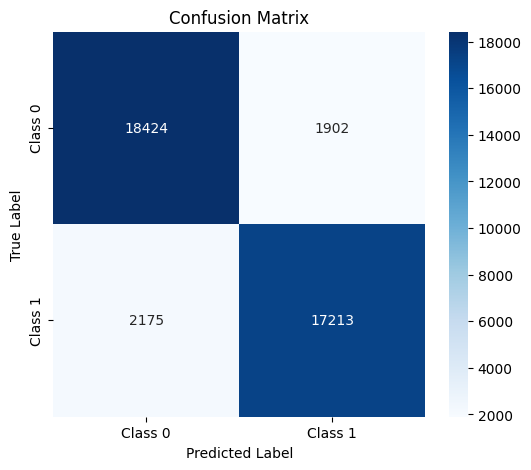

In [14]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


C:\Users\loges\AppData\Local\Temp\ipykernel_30028\3884570155.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


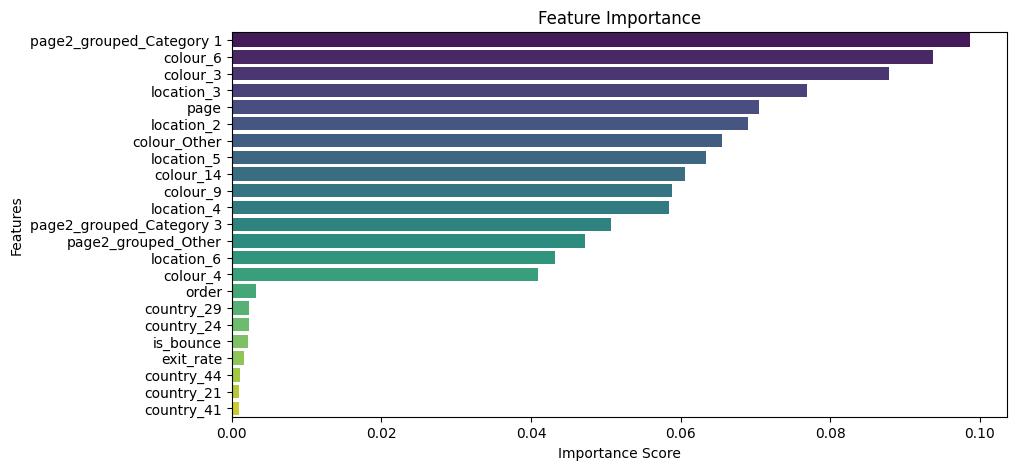

In [26]:
importances = model.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()


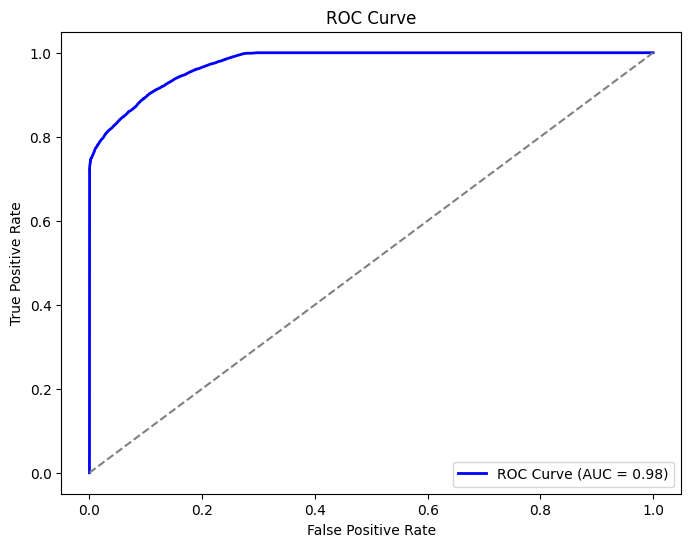

In [27]:
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_prob = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


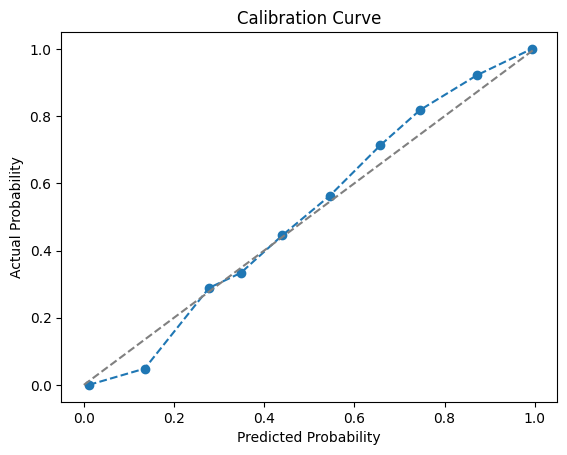

In [28]:
from sklearn.calibration import calibration_curve

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker="o", linestyle="dashed")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Perfect calibration
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Probability")
plt.title("Calibration Curve")
plt.show()


###### # **Result for Test dataset**

In [1]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000/")
run_id = "b2cfd148b6b045b9b6fee0479dea25e8"

# Correct model URI
model_uri = f"runs:/{run_id}/model"

# Load the model
model = mlflow.xgboost.load_model(model_uri)  


In [4]:
df = pd.read_csv("D:/Project/Clickstream_Project/Clickstream/Data/test_data.csv")

In [12]:
import sys
sys.path.append("D:/Project/Clickstream_Project/Clickstream/Streamlit/")



import preprocessing_streamlit

df_processed = preprocessing_streamlit.preprocess_data(df, problem_type="Classification")

print(df_processed.head())

D:\Project/Clickstream_Project/Clickstream/Streamlit\preprocessing_streamlit.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["time_spent_per_category"] = df.groupby(["session_id", "page1_main_category"])[


       order  page  is_bounce  exit_rate  page2_grouped_Category 1  \
24867      1     1          1  -0.608045                         1   
7095       4     2          1  -0.608045                         0   
10436      2     1          0   0.515759                         0   
1649       4     1          0   0.515759                         0   
15864      6     5          0  -0.608045                         0   

       page2_grouped_Category 3  page2_grouped_Other  country_21  country_24  \
24867                         0                    0           0           0   
7095                          0                    0           0           0   
10436                         1                    0           0           0   
1649                          1                    0           0           0   
15864                         0                    1           0           0   

       country_29  ...  colour_6  colour_9  colour_14  colour_Other  \
24867           1  ...     

In [13]:
x = df_processed.drop('price_2', axis=1)
y = df_processed['price_2']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 1)

In [15]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(x_test)

import xgboost as xgb

y_test = np.where(y_test == 2, 1, 0)

# Convert probabilities to class labels if needed

if isinstance(model, xgb.XGBClassifier):
    y_pred = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.65      0.70      0.67      5115
     Class 1       0.65      0.60      0.63      4814

    accuracy                           0.65      9929
   macro avg       0.65      0.65      0.65      9929
weighted avg       0.65      0.65      0.65      9929



In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
importances = model.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_prob = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
from sklearn.calibration import calibration_curve

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

# Plot calibration curve
plt.plot(prob_pred, prob_true, marker="o", linestyle="dashed")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Perfect calibration
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Probability")
plt.title("Calibration Curve")
plt.show()
